<a href="https://colab.research.google.com/github/derianr32/Parcial-1-Derian-Rivas/blob/main/Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Punto 1


In [ ]:
import numpy as np

# ----- Parámetros -----
A = 2.0          # Amplitud de la primera señal
B = 3.0          # Amplitud de la segunda señal
w0 = 2*np.pi     # Frecuencia fundamental (se asume T = 1, por lo tanto w0 = 2π)

# Pares de (n, m) para probar:
# - El primero tiene n+m ≠ 0 (frecuencias diferentes)
# - El segundo tiene n+m = 0  (frecuencias opuestas)
# - El tercero ambos son 0 (componentes DC)
tests = [(2, 1),   # n+m=3  → se espera d² = A² + B²
         (3, -3),  # n+m=0  → se espera d² = (A - B)²
         (0, 0)]   # n+m=0  → se espera d² = (A - B)²


# ----- Función para calcular la distancia media numérica -----
def time_average_sq_distance(A, B, n, m, w0, T_total=200.0, fs=20000):
    """
    Calcula numéricamente la distancia media cuadrática entre x1(t) y x2(t):

    d² = lim_{T→∞} (1/T) ∫ |x1 - x2|² dt

    Para ello se aproxima usando un intervalo grande T_total y una alta
    frecuencia de muestreo fs.
    """
    # Vector de tiempo desde 0 hasta T_total con paso 1/fs
    t = np.arange(0.0, T_total, 1.0/fs)

    # Definición de las señales complejas
    x1 = A * np.exp(-1j * n * w0 * t)   # x1(t) = A·e^(-j·n·w0·t)
    x2 = B * np.exp( 1j * m * w0 * t)   # x2(t) = B·e^( j·m·w0·t)

    # Diferencia al cuadrado (magnitud al cuadrado)
    diff2 = np.abs(x1 - x2)**2

    # Promedio temporal de |x1 - x2|² (integral discreta / T_total)
    return diff2.mean()


# ----- Cálculo y comparación entre resultado analítico y numérico -----
for (n, m) in tests:
    # Distancia media numérica (aproximación)
    d2_num = time_average_sq_distance(A, B, n, m, w0)

    # Resultado analítico según el desarrollo teórico
    if (n + m) == 0:
        d2_ana = (A - B)**2       # Caso n+m=0
    else:
        d2_ana = A**2 + B**2      # Caso n+m≠0

    # Mostrar resultados
    print(f"(n, m)=({n:2d}, {m:2d}) -> d² numérica = {d2_num:.6f} | d² analítica = {d2_ana:.6f}")

(n, m)=( 2,  1) -> d² numérica = 13.000000 | d² analítica = 13.000000
(n, m)=( 3, -3) -> d² numérica = 1.000000 | d² analítica = 1.000000
(n, m)=( 0,  0) -> d² numérica = 1.000000 | d² analítica = 1.000000


#Punto 2

In [ ]:
#importamos las librerias que vamos a usar
import matplotlib.pyplot as plt #importamos la libreria matplotlib con el alias plt para graficar
import numpy as np #importamos la libreria numpy con el alias np para trabajar con arrreglos
from scipy.spatial.distance import cdist #importamos la funcion cdist de scipy.spatial.distance

In [ ]:
#definimos las variables de nuestra señal
A1 = 3 #amplitud 1
A2 = 5 #amplitud 2
A3 = 10 #amplitud 3

W1 = 1000*np.pi #frecuencia 1
W2 = 3000*np.pi #frecuencia 2
W3 = 11000*np.pi #frecuencia 3

U1 = 0 #fase 1
U2 = 0 #fase 2
U3 = 0 #fase 3

In [ ]:
#calculamos las frecuencias y periodos de nuestra señal
F1 = (W1/(2*np.pi)) #frecuencia 1
F2 = (W2/(2*np.pi)) #frecuencia 2
F3 = (W3/(2*np.pi)) #frecuencia 3

T1 = 1/F1 #periodo 1
T2 = 1/F2 #periodo 2
T3 = 1/F3 #periodo 3

T = (1/500)#periodo de la señal cuasiperiodica

#imprimimos las frecuencias y periodos para comparar con lo realizado
print("Las frecuencias son: ", F1, F2, F3)
print("Los periodos son: ", T1, T2, T3)

Las frecuencias son:  499.99999999999994 1500.0 5499.999999999999
Los periodos son:  0.002 0.0006666666666666666 0.00018181818181818186


In [ ]:
#frecuencia y periodo de muestreo
Fs = 5000
Ts = 1/Fs
print("La frecuencia de muestreo es: ", Fs)
print("El periodo de muestreo es: ", Ts)

La frecuencia de muestreo es:  5000
El periodo de muestreo es:  0.0002


In [ ]:
#definimos el vector tiempo
ti = 0 #empezamos en 0
tf = 3*T #3 periodos hacia delante

tv = np.arange(ti,tf,Ts) #tiempo de muestreo

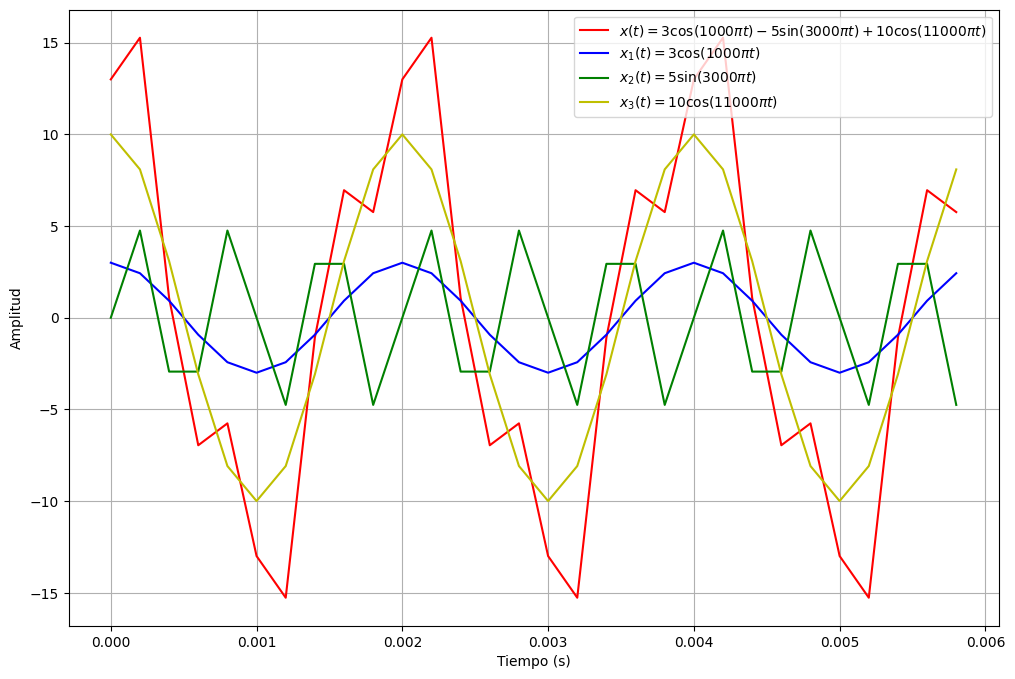

In [ ]:
# construimos la señal
x1 = A1*np.cos(W1*tv+U1)
x2 = A2*np.sin(W2*tv+U2)
x3 = A3*np.cos(W3*tv+U3)
x = x1 + x2 + x3

# graficamos la señal para ver el comportamiento y adicionalmente graficamos cada señal individualmente para mirar al final la suma de las 3
plt.figure(figsize=(12, 8))
plt.plot(tv, x,  'r', label=r'$x(t) = 3\cos(1000πt)- 5\sin(3000πt)+ 10\cos(11000πt)$')
plt.plot(tv, x1, 'b', label=r'$x_1(t) = 3\cos(1000πt)$')
plt.plot(tv, x2, 'g', label=r'$x_2(t) = 5\sin(3000πt)$')
plt.plot(tv, x3, 'y', label=r'$x_3(t) = 10\cos(11000πt)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
#realizamos el cero y pendiente que es el proceso de digitalizacion de la señal
#crear funcion en python
#reutilizamos le funciòn realizada por el profesor
def my_ceropen(x,ymin, ymax):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # encuentra el maximo de la señal
  xmin = min(x) # encuentra el minimo de la señal
  m = (ymax - ymin)/(xmax - xmin) #encuentra la pendiente
  c = ymin - m*xmin #encuentra el cero
  yv = m*x + c #nuestra señal luego de aplicarle cero y pendiente
  return yv

In [ ]:
#realizamos el cero y pendiente que es el proceso de digitalizacion de la señal
#crear funcion en python
#reutilizamos le funciòn realizada por el profesor
def my_ceropen(x,ymin, ymax):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # encuentra el maximo de la señal
  xmin = min(x) # encuentra el minimo de la señal
  m = (ymax - ymin)/(xmax - xmin) #encuentra la pendiente
  c = ymin - m*xmin #encuentra el cero
  yv = m*x + c #nuestra señal luego de aplicarle cero y pendiente
  return yv

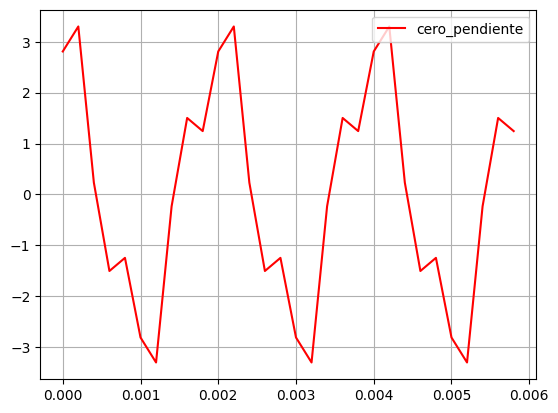

In [ ]:
ymin = -3.3
ymax = 3.3
xcp = my_ceropen(x, ymin, ymax) #le mandamos a la funcion nuestra señal para aplicar ceri y pendiente

#graficamos la señal luego de aplicarle cero y pendiente
plt.plot(tv,xcp,'r',label='cero_pendiente')
plt.legend()
plt.grid()
plt.show()

In [ ]:
nbits = 4 #numero de bits propuestos en el ejercicio
num_est = 2**nbits #numero de estados de cuantificacion
vq = np.linspace(ymin,ymax,num_est) #vector llamado vq con los niveles de cuantificacion
vq

array([-3.3 , -2.86, -2.42, -1.98, -1.54, -1.1 , -0.66, -0.22,  0.22,
        0.66,  1.1 ,  1.54,  1.98,  2.42,  2.86,  3.3 ])

In [ ]:
#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [ ]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(xcp.shape[0]): #usamos esto para iterar sobre cada elemento de nuestro xcp
   if i==0: #primera muestra
     yq = my_cuantizador(xcp[i],vq)
   else:
     yq = np.append(yq,my_cuantizador(xcp[i],vq)) #apilar datos cuantizando si i>0

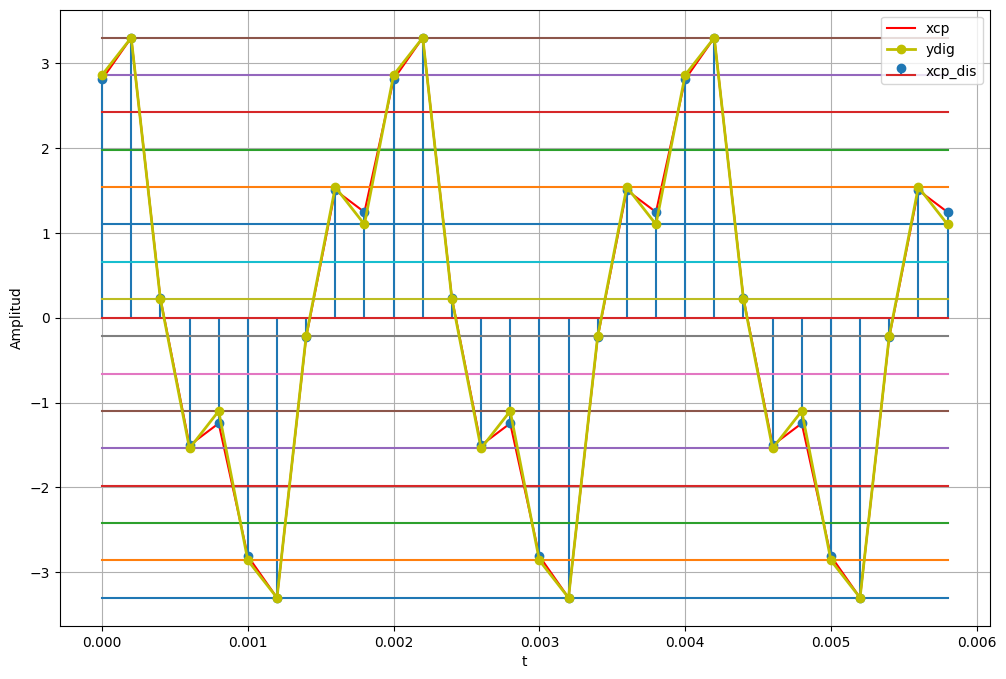

In [ ]:
#graficar señales
plt.figure(figsize=(12, 8))
plt.plot(tv,xcp,c='r', label='xcp')#cs continua

plt.stem(tv,xcp, label='xcp_dis')#cs discreta

#estados de cuantización

for v in vq:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

##Ahora realizamos el proceso para la señal que sea automatico y que analice si la frecuencia de muestreo es adecuada

In [ ]:
#frecuencia y periodo de muestreo
Fs = int(input("Ingrese la frecuencia de muestreo con la que desea trabajar:"))
while Fs < 2*max(F1,F2,F3):
  print("La frecuencia de muestreo no es adecuada")
  Fs = int(input(f"Vuelva a ingresar la frecuencia de muestreo con la que desea trabajar, recuerde que debe ser mayor o igual que {2*max(F1, F2, F3)}: "))
Ts = 1/Fs
print("La frecuencia de muestreo es: ", Fs)
print("El periodo de muestreo es: ", Ts)

Ingrese la frecuencia de muestreo con la que desea trabajar:33000
La frecuencia de muestreo es:  33000
El periodo de muestreo es:  3.0303030303030302e-05


In [ ]:
#definimos el vector tiempo
ti = 0 #empezamos en 0
tf = 3*T #3 periodos hacia delante

tv = np.arange(ti,tf,Ts) #tiempo de muestreo

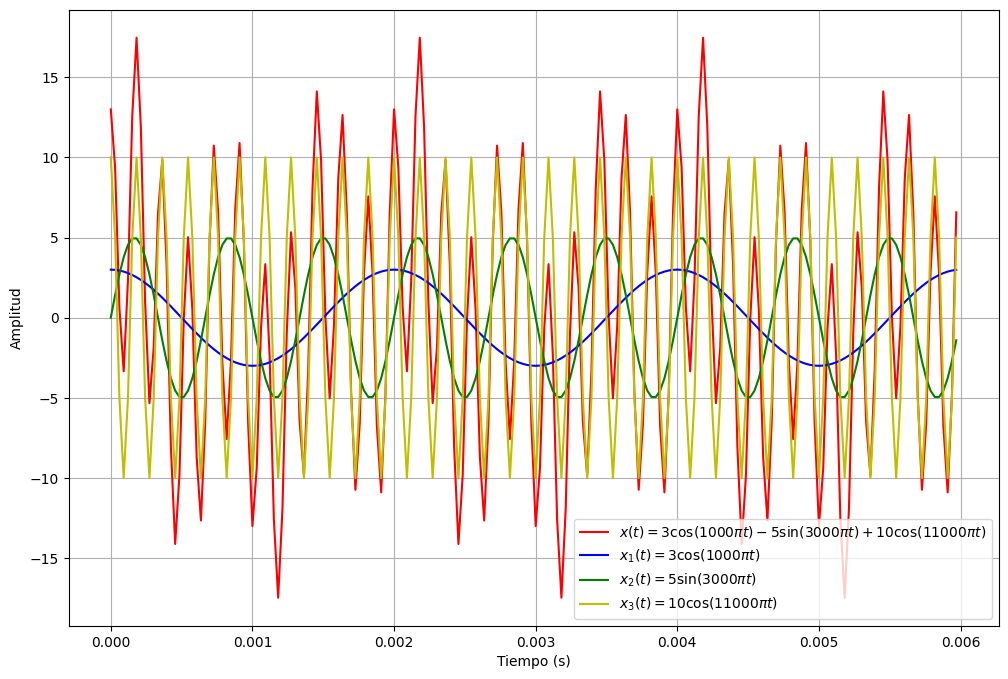

In [ ]:
# construimos la señal
x1 = A1*np.cos(W1*tv+U1)
x2 = A2*np.sin(W2*tv+U2)
x3 = A3*np.cos(W3*tv+U3)
x = x1 + x2 + x3

# graficamos la señal para ver el comportamiento y adicionalmente graficamos cada señal individualmente para mirar al final la suma de las 3
plt.figure(figsize=(12, 8))
plt.plot(tv, x,  'r', label=r'$x(t) = 3\cos(1000πt)- 5\sin(3000πt)+ 10\cos(11000πt)$')
plt.plot(tv, x1, 'b', label=r'$x_1(t) = 3\cos(1000πt)$')
plt.plot(tv, x2, 'g', label=r'$x_2(t) = 5\sin(3000πt)$')
plt.plot(tv, x3, 'y', label=r'$x_3(t) = 10\cos(11000πt)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

Ingrese el valor minimo del A/D:-3.3
Ingrese el valor maximo del A/D:3.3


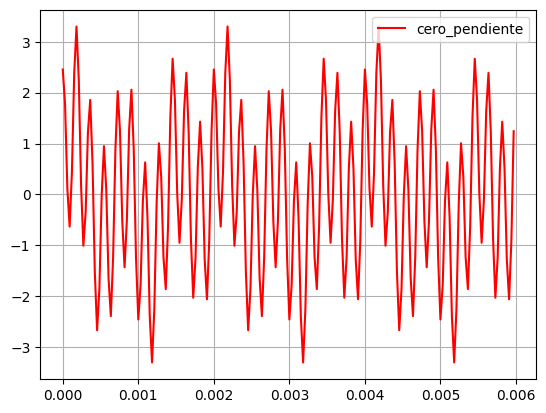

In [ ]:
ymin = float(input("Ingrese el valor minimo del A/D:"))
ymax = float(input("Ingrese el valor maximo del A/D:"))
while ymax < ymin:
  print("El valor maximo del A/D debe ser mayor al valor minimo")
  ymin = float(input("Vuelva a ingresar el valor minimo del A/D:"))
  ymax = float(input("Vuelva a ingresar el valor maximo del A/D"))
xcp = my_ceropen(x, ymin, ymax) #le mandamos a la funcion nuestra señal para aplicar ceri y pendiente

#graficamos la señal luego de aplicarle cero y pendiente
plt.plot(tv,xcp,'r',label='cero_pendiente')
plt.legend()
plt.grid()
plt.show()

In [ ]:
nbits = int(input("Ingrese el nùmero de bits con el que desea trabajar:"))  #numero de bits propuestos en el ejercicio
num_est = 2**nbits #numero de estados de cuantificacion
vq = np.linspace(ymin,ymax,num_est) #vector llamado vq con los niveles de cuantificacion
vq

Ingrese el nùmero de bits con el que desea trabajar:4


array([-3.3 , -2.86, -2.42, -1.98, -1.54, -1.1 , -0.66, -0.22,  0.22,
        0.66,  1.1 ,  1.54,  1.98,  2.42,  2.86,  3.3 ])

In [ ]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(xcp.shape[0]): #usamos esto para iterar sobre cada elemento de nuestro xcp
   if i==0: #primera muestra
     yq = my_cuantizador(xcp[i],vq)
   else:
     yq = np.append(yq,my_cuantizador(xcp[i],vq)) #apilar datos cuantizando si i>0

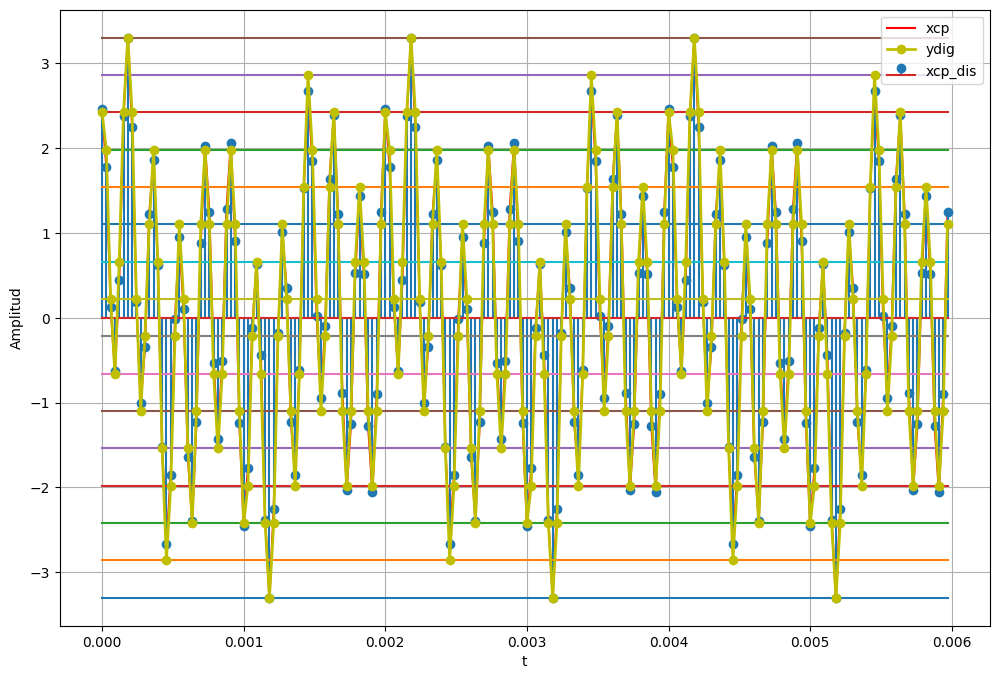

In [ ]:
#graficar señales
plt.figure(figsize=(12, 8))
plt.plot(tv,xcp,c='r', label='xcp')#cs continua

plt.stem(tv,xcp, label='xcp_dis')#cs discreta

#estados de cuantización

for v in vq:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

#Punto 4

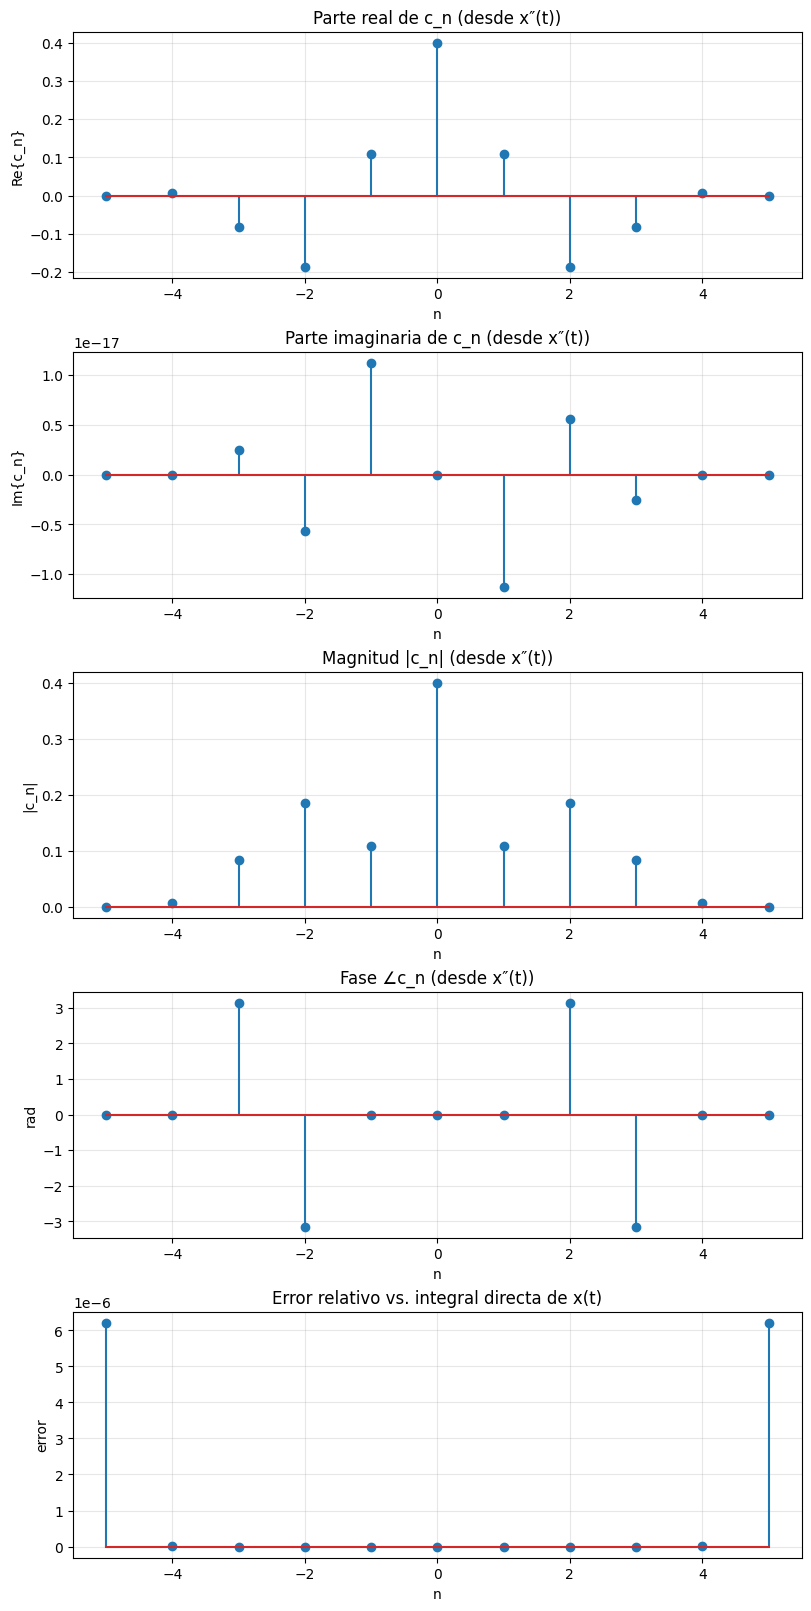

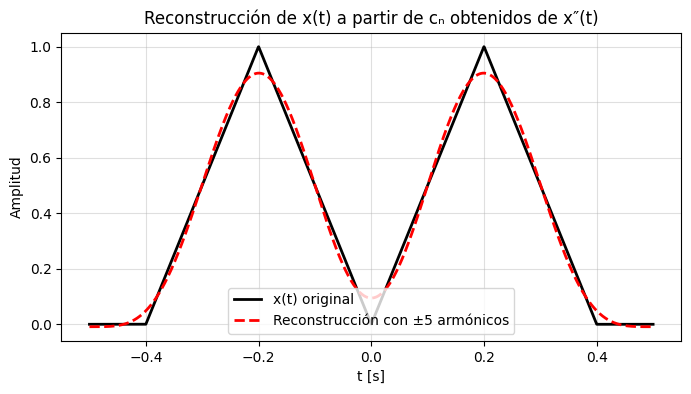

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------- Parámetros de la señal ----------------
A  = 1.0        # Amplitud de los picos
d1 = 0.2        # Posición del pico (0 < d1 < d2)
d2 = 0.4        # Fin del soporte dentro del periodo (d1 < d2 < T/2)
T  = 1.0        # Periodo (elige conveniente; omega0=2π/T)
w0 = 2*np.pi/T

# Armónicos a evaluar
Nset = np.array([0, 1, 2, 3, 4, 5])   # usaremos ±N
Ns   = np.concatenate((-Nset[:0:-1], Nset))  # [-5,-4,-3,-2,-1,0,1,2,3,4,5]

# ---------------- Saltos de pendiente (pesos de deltas) ----------------
m1 =  A/(d2-d1)
m2 = -A/d1
m3 =  A/d1
m4 = -A/(d2-d1)

J = {
    -d2: m1 - 0.0,
    -d1: m2 - m1,
     0.0: m3 - m2,
     d1: m4 - m3,
     d2: 0.0 - m4
}
tk = np.array(sorted(J.keys()))
Jk = np.array([J[t] for t in tk])

# ---------------- Coeficientes c_n desde x''(t) ----------------
def c_from_xpp(n):
    if n == 0:
        return A*d2/T  # promedio (DC)
    S = np.sum(Jk * np.exp(-1j*n*w0*tk))
    return - S / (n**2 * w0**2 * T)

c_xpp = np.array([c_from_xpp(n) for n in Ns])

# ---------------- Coeficientes c_n directo desde x(t) (numérico) ----------------
# Definición por tramos de x(t) en un periodo centrado (integral numérica)
def x_piecewise(t):
    # traemos t al intervalo principal (-T/2, T/2]
    tt = ((t + T/2) % T) - T/2
    x = np.zeros_like(tt)

    # Tramos: [-d2,-d1] sube, [-d1,0] baja, [0,d1] sube, [d1,d2] baja
    mask1 = (tt >= -d2) & (tt < -d1)
    x[mask1] = (tt[mask1] + d2) * (A/(d2-d1))  # recta que sube hasta A en -d1

    mask2 = (tt >= -d1) & (tt < 0)
    x[mask2] = A + (tt[mask2] + d1) * (-A/d1)  # baja de A a 0 en 0

    mask3 = (tt >= 0) & (tt < d1)
    x[mask3] = (tt[mask3]) * (A/d1)            # sube de 0 a A en d1

    mask4 = (tt >= d1) & (tt < d2)
    x[mask4] = A + (tt[mask4] - d1) * (-A/(d2-d1))  # baja de A a 0 en d2

    # fuera de [-d2,d2]: x=0
    return x

def c_from_x_numeric(n, M=200000):
    # Integramos sobre un periodo con muchas muestras
    t = np.linspace(-T/2, T/2, M, endpoint=False)
    x = x_piecewise(t)
    if n == 0:
        return (1/T) * np.trapezoid(x, t)
    kernel = np.exp(-1j*n*w0*t)
    return (1/T) * np.trapezoid(x * kernel, t)

c_x = np.array([c_from_x_numeric(n) for n in Ns])

# ---------------- Error relativo ----------------
eps = 1e-12
err_rel = np.abs(c_x - c_xpp) / np.maximum(eps, np.abs(c_x))

# ---------------- Gráficas: Re, Im, |.|, fase, error ----------------
def stem(ax, nvals, y, title, ylabel):
    markerline, stemlines, baseline = ax.stem(nvals, y)
    ax.set_title(title)
    ax.set_xlabel('n')
    ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.3)

fig, axs = plt.subplots(5, 1, figsize=(8, 16), constrained_layout=True)

stem(axs[0], Ns, np.real(c_xpp), 'Parte real de c_n (desde x″(t))', 'Re{c_n}')
stem(axs[1], Ns, np.imag(c_xpp), 'Parte imaginaria de c_n (desde x″(t))', 'Im{c_n}')
stem(axs[2], Ns, np.abs(c_xpp),  'Magnitud |c_n| (desde x″(t))', '|c_n|')

# fase segura (evita NaN en n=0 y valores ~0)
phase = np.angle(c_xpp)
phase[np.abs(c_xpp) < 1e-14] = 0.0
stem(axs[3], Ns, phase, 'Fase ∠c_n (desde x″(t))', 'rad')

stem(axs[4], Ns, err_rel, 'Error relativo vs. integral directa de x(t)', 'error')

plt.show()

# ---------------- Reconstrucción de x(t) a partir de los coeficientes ----------------
Nmax = 5                                # número de armónicos usados
t_rec = np.linspace(-T/2, T/2, 2000)    # vector temporal en un periodo
x_rec = np.zeros_like(t_rec, dtype=complex)

# Reconstrucción usando la serie de Fourier truncada
for n in range(-Nmax, Nmax + 1):
    idx = np.where(Ns == n)[0][0]
    x_rec += c_xpp[idx] * np.exp(1j * n * w0 * t_rec)

# Tomamos la parte real (la señal es real)
x_rec = np.real(x_rec)

# Señal original (para comparar)
x_true = x_piecewise(t_rec)

# ---------------- Gráfica de comparación ----------------
plt.figure(figsize=(8,4))
plt.plot(t_rec, x_true, 'k', lw=2, label='x(t) original')
plt.plot(t_rec, x_rec, 'r--', lw=2, label=f'Reconstrucción con ±{Nmax} armónicos')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.title('Reconstrucción de x(t) a partir de cₙ obtenidos de x″(t)')
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()